In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [42]:
df = pd.read_csv('04-data/preprocessed_app_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     22050 non-null  object 
 1   description               22050 non-null  object 
 2   summary                   22049 non-null  object 
 3   installs                  22050 non-null  object 
 4   minInstalls               22050 non-null  float64
 5   score                     22050 non-null  float64
 6   ratings                   22050 non-null  float64
 7   reviews                   22050 non-null  float64
 8   histogram                 22050 non-null  object 
 9   price                     22050 non-null  float64
 10  free                      22050 non-null  int64  
 11  currency                  22050 non-null  object 
 12  sale                      22050 non-null  bool   
 13  offersIAP                 22050 non-null  bool   
 14  inAppP

In [43]:
df1 = df[['title','minInstalls','reviews','ratings','free','containsAds','genre','editorsChoice','contentRating',
          'year','top_developer','has_video','installs_day','updated_days','score']]

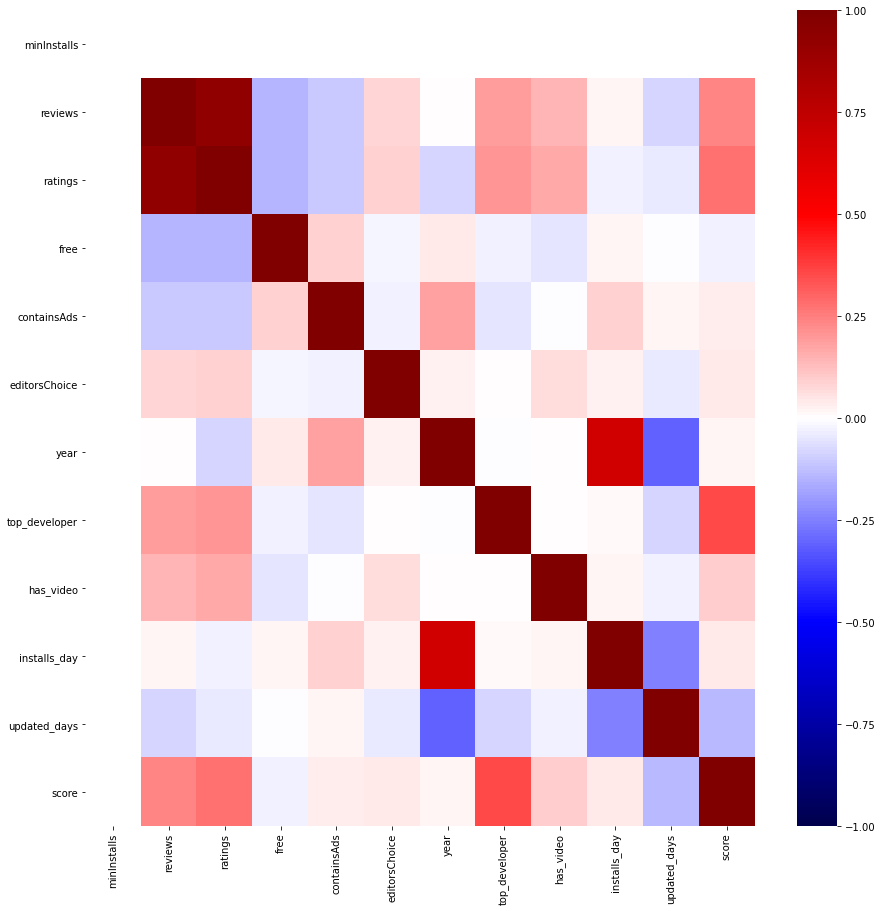

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

#### Observations

- Fairly strong correlation between minInstalls and number of ratings. Drop minInstalls from the regression analysis, given it is bucketed. 
- Strong correlations between year, days since last update and also installs per day. Remove one at a time during regression analyis

<ipython-input-45-2159c77aeb6c>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1000000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1000000.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1000000.0 results in singular transformations; automatic

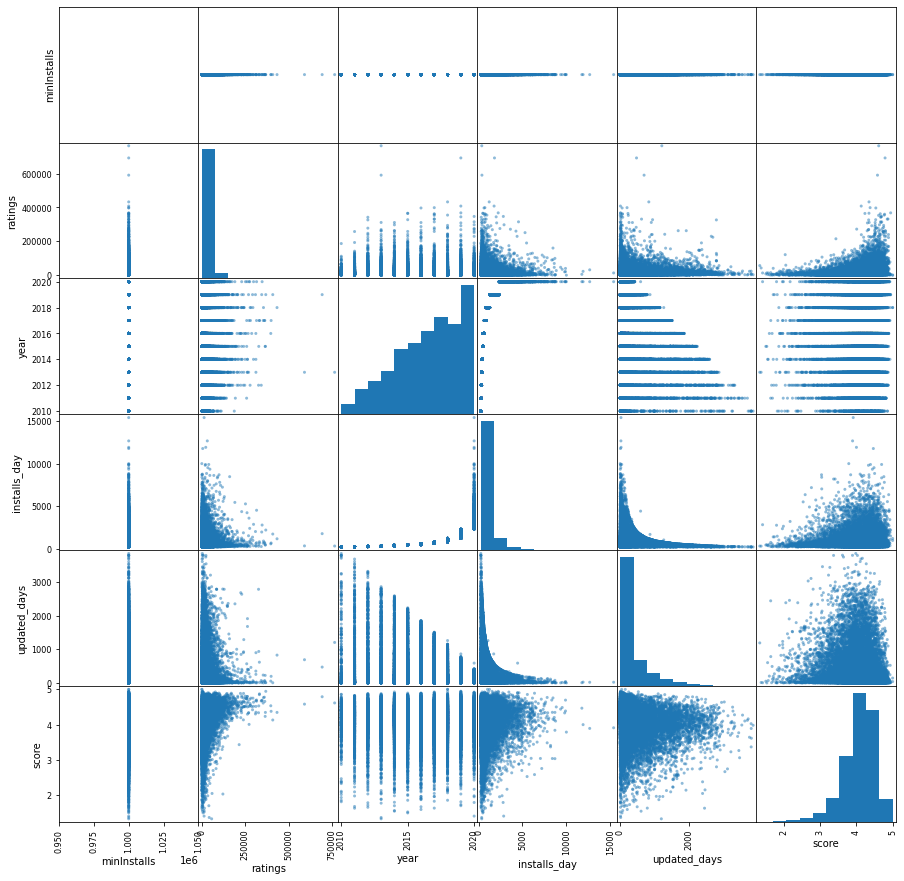

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);

#### Observations

Score (the target) has a left skew, which is further demonstrated in the images below

In [46]:
print('Average app score overall: {:.3f}'.format(df1['score'].mean()))
print('Median app score overall: {:.3f}'.format(df1['score'].median()))

Average app score overall: 4.068
Median app score overall: 4.134


/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


- Total number of ratings: 22050
- Mean of distribution of rating : 4.067607774707473
- Standard deviation: 0.4499444604734756


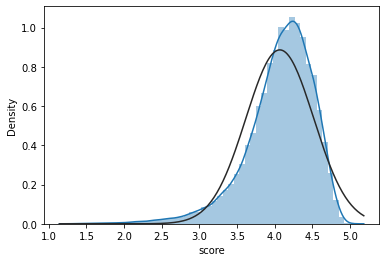

In [47]:
sns.distplot(df1['score'],fit=stats.norm)
print('- Total number of ratings:', len(df1['score']))
print('- Mean of distribution of rating :', np.mean(df1['score']))
print('- Standard deviation:', np.std(df1['score']))

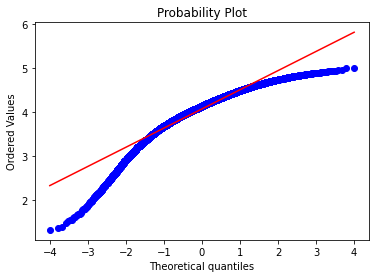

In [48]:
fig = plt.figure() 
prob = stats.probplot(df['score'], plot=plt)

### By content rating

In [49]:
df1.groupby('contentRating')['contentRating'].count()

contentRating
Everyone        16523
Everyone 10+     1084
Mature 17+        896
Teen             3547
Name: contentRating, dtype: int64

In [50]:
df1.groupby('contentRating')['score'].mean()

contentRating
Everyone        4.070989
Everyone 10+    4.104545
Mature 17+      4.012021
Teen            4.054608
Name: score, dtype: float64

### By app genre

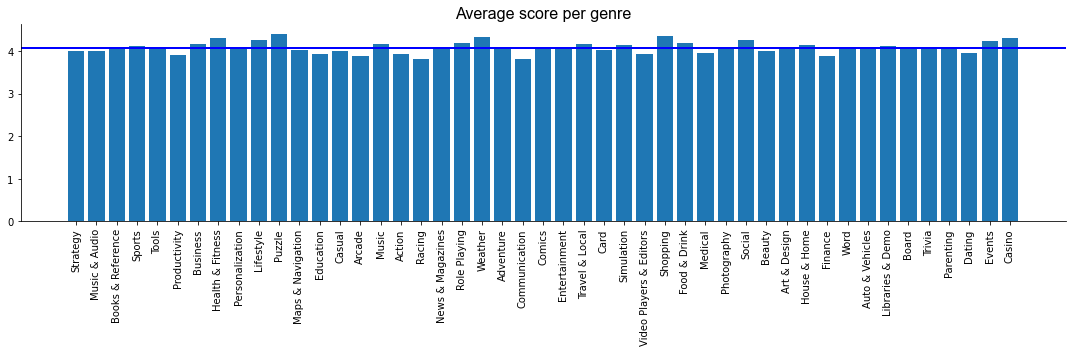

In [51]:
app_genre_score = df.groupby('genre')['score'].mean()
genre_list = df1['genre'].unique()
mean_score = df1['score'].mean()

plt.figure(figsize=[15,5])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(mean_score, label= 'Mean score', color = 'blue', linewidth=2)
plt.bar(genre_list,app_genre_score)   
plt.xticks(genre_list,rotation=90)
plt.title('Average score per genre',family='arial',fontsize=16)
plt.tight_layout()

plt.show;

Does not appear to be significant differences in mean user score across genres

In [52]:
df1.groupby('genre')['genre'].count()

genre
Action                     1067
Adventure                   575
Arcade                      742
Art & Design                144
Auto & Vehicles              89
Beauty                       62
Board                       229
Books & Reference           354
Business                    209
Card                        225
Casino                      154
Casual                     1187
Comics                       63
Communication               400
Dating                       75
Education                  1232
Entertainment              1290
Events                       10
Finance                     414
Food & Drink                106
Health & Fitness            420
House & Home                 45
Libraries & Demo             29
Lifestyle                   582
Maps & Navigation           194
Medical                      74
Music                        78
Music & Audio               656
News & Magazines            172
Parenting                    52
Personalization            1136
Ph

### By whether the app contains ads

In [53]:
df1.groupby('containsAds')['score'].mean()

containsAds
0    4.035448
1    4.075126
Name: score, dtype: float64

Does not appear to be a large difference in apps that do / don't contain ads

### By whether the app is an Editor's Choice

In [54]:
df1.groupby('editorsChoice')['editorsChoice'].count()

editorsChoice
0    21903
1      147
Name: editorsChoice, dtype: int64

In [55]:
df1.groupby('editorsChoice')['score'].mean()

editorsChoice
0    4.066016
1    4.304856
Name: score, dtype: float64

Apps marked as 'Editor's Choice' appear to have higher average score. Makes sense given likely to promote higher quality apps

### By whether the app is free

In [56]:
df1.groupby('free')['free'].count()

free
0       82
1    21968
Name: free, dtype: int64

In [57]:
df1.groupby('free')['score'].mean()

free
0    4.253474
1    4.066914
Name: score, dtype: float64

Paid-for apps appear to have a higher average score. This makes sense given you expect highr quality when you are paying for access

### By top developer in terms of average app score

In [58]:
df1.groupby('top_developer')['score'].mean()

top_developer
0    4.027820
1    4.700091
Name: score, dtype: float64

### By whether the app posting has a video

In [59]:
df1.groupby('has_video')['has_video'].count()

has_video
0    14701
1     7349
Name: has_video, dtype: int64

In [60]:
df1.groupby('has_video')['score'].mean()

has_video
0    4.036302
1    4.130232
Name: score, dtype: float64